# Movie Critic Explorer Front End
## Created for SEDS FALL 2019

This project was created to be able to explore movie critic scores and sentiments over time. To use it, use the setup.py file to download all necessary packages. After that, you can use this jupyter notebook as a front-end to access all of the modles and run a sentiment analysis. Throughout the program, you will be asked to specify a time range of interest and a year of interest to create certain visualizations. You can also use main.py for the same thing.

#### Created by: Melinda Haughey, Olivia Li, and Jessica Liu


### Import Relevant Packages

In [1]:
import altair as alt
from ipywidgets import interact,widgets
import pandas as pd
import nltk
nltk.download('stopwords')
from movieCriticsOverTime import sentiment_analysis,visualization,word_cloud, clean_data, overall_rating

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Melinda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import Data

To use your own data here, simply replace the reference

In [2]:
MOVIES = pd.read_csv("data/movies.dat", delimiter='\t')
REVIEWS = pd.read_csv('data/reviews.csv')

### Clean Data

This puts the data in the correct format for use in the modules

In [3]:
SUB_MOVIES = clean_data.clean_movies(MOVIES)
REVIEWS_CLEAN = clean_data.clean_reviews(REVIEWS)
REVIEWS_MERGE = clean_data.merge_movies_reviews(REVIEWS_CLEAN,SUB_MOVIES)

### View Overall Shape of Review Scores Over User Specified Time.

This will show you a visualization of the average rating per year. From here, you can find a year of interest to dive further into. If you are runnning main.py instead of using jupyter notebook as the front end, this will export into your folder as overallratings.html.

*Select Year Range of Interest*


In [4]:
print('Please insert the start year of a range of interest between 1903 and 2009')
start_year = int(input())

Please insert the start year of a range of interest between 1903 and 2009
1970


In [5]:
print('Please insert the end year of a range of interest between 1903 and 2009')

end_year = int(input())

Please insert the end year of a range of interest between 1903 and 2009
2005


In [6]:
#Initialize ability to see visualization in Jupyter Notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

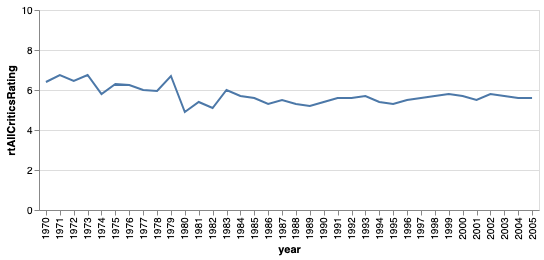

In [7]:
overall_rating.draw_trend_line_median_year(SUB_MOVIES,start_year,end_year)

### Select a Year of Interest to See Top Critics of that Year and Thier Sentiment

Did you see an interesting spike or valley? If so, maybe investigate that more to see what critics could be driving that change!

In [8]:
print('Please input a year of interest to see critic activity that year: ')
interest_year = int(input())

Please input a year of interest to see critic activity that year: 
1979


In [9]:
top_critics = overall_rating.top5_critic_per_year(REVIEWS_MERGE,interest_year)
print('The top critics that year are:')
pd.DataFrame(top_critics)
#add number of Reviews

The top critics that year are:


,0
0,Variety Staff
1,Dave Kehr
2,Roger Ebert
3,Vincent Canby
4,Janet Maslin


### Grab Top Critic Reviews for Year of Interest and Analyze them for Sentiment

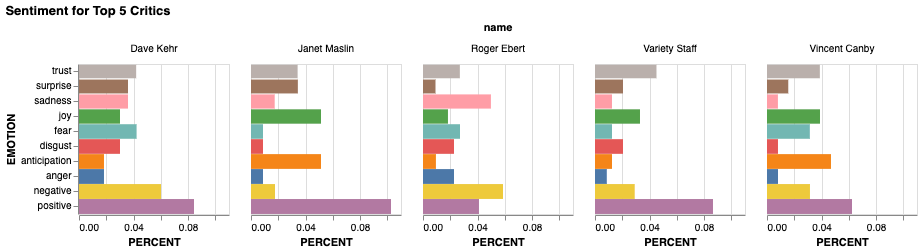

In [10]:
QUOTES = sentiment_analysis.grab_quotes(REVIEWS_MERGE,top_critics,interest_year)
EMOTION_ARRAY = sentiment_analysis.analyze_quote(QUOTES,top_critics)

visualization.visualize(EMOTION_ARRAY)

### Word Cloud for Top 5 Critic Words
You can see what words are most commonly used by the critics listed above in the word cloud. This could suggest movies or reasons that may have impacted the overall score for your selected year. 

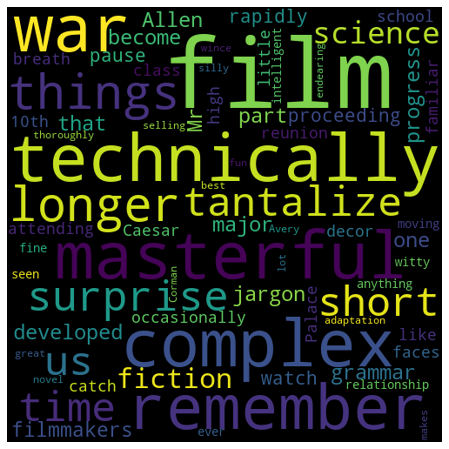

In [11]:
word_cloud.vis_word_cloud(QUOTES)